In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_features=5 , n_informative=5 , n_redundant=0 , n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X , columns=['col1' , 'col2' , 'col3' , 'col4' , 'col5'])
df['target'] = Y

In [5]:
df.shape

(100, 6)

In [6]:
df.head()


,col1,col2,col3,col4,col5,target
0,-0.963805,1.595211,-0.631481,1.075179,-0.504009,0
1,-2.733593,1.303340,-0.739062,-0.409436,-2.563007,0
2,0.136367,2.175154,-0.258293,-0.121749,-1.267286,1
3,-2.746879,2.598372,-0.564352,0.093571,-3.778086,1
4,-1.184186,0.248959,-1.091381,-0.048062,-3.066926,1


In [9]:
# function for row sampling

def sample_rows(df , percent):
    return df.sample(int(df.shape[0]*percent) , replace=True)

In [12]:
df_1 = sample_rows(df , 0.5)

In [13]:
df_1.shape

(50, 6)

In [16]:
import random as random

In [50]:
# function for feature sampling
def sample_features(df , percent):
    cols = random.sample(df.columns.tolist()[:-1] , int((df.shape[1]-1)*percent))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [51]:
df_2 = sample_features(df , 0.8)

C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_16028\3270724214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [52]:
df_2.head()

,col3,col1,col4,col5,target
0,-0.631481,-0.963805,1.075179,-0.504009,0
1,-0.739062,-2.733593,-0.409436,-2.563007,0
2,-0.258293,0.136367,-0.121749,-1.267286,1
3,-0.564352,-2.746879,0.093571,-3.778086,1
4,-1.091381,-1.184186,-0.048062,-3.066926,1


In [21]:
def combined_sampling( df , row_percent , col_percent ):
    new_df = sample_rows(df , row_percent)
    return sample_features( new_df , col_percent )

In [43]:
df1 = sample_rows(df , 0.2)
df2 = sample_rows(df , 0.2)
df3 = sample_rows(df , 0.2)

In [44]:
df1.shape

(20, 6)

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [46]:
clf1.fit(df1.iloc[:,0:5] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5] , df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.002\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.5, 'x[1] <= -0.36\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

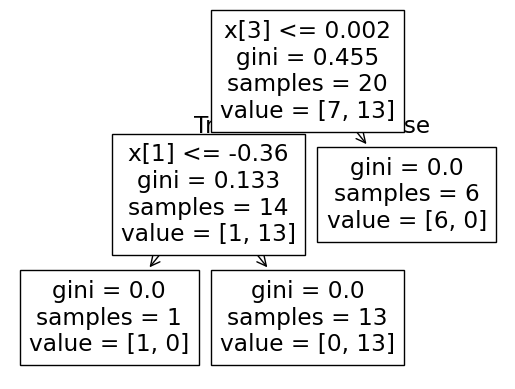

In [47]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= -0.931\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.625, 0.5, '  False')]

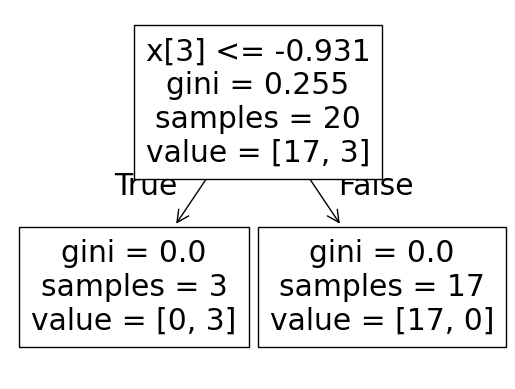

In [48]:
plot_tree(clf2)

[Text(0.2857142857142857, 0.9, 'x[3] <= -0.883\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'x[0] <= -3.373\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.5, 'x[4] <= -0.414\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7142857142857143, 0.3, 'x[2] <= -0.55\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

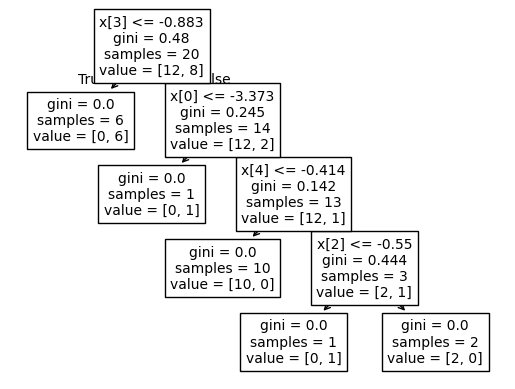

In [49]:
plot_tree(clf3)